In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print(housing.median_house_value.max(),housing.median_house_value.min())

500001.0 14999.0


In [7]:
pd.cut(housing.median_house_value,[14000,100001,200001,300001,400001,500002],labels=['very cheap','cheap','medium','expensive','very expensive']).value_counts()

cheap             8273
medium            4873
very cheap        3658
expensive         2092
very expensive    1744
Name: median_house_value, dtype: int64

In [8]:
8273 + 4873 + 3658 +2092 +1744

20640

In [9]:
len(housing.median_house_value)

20640

In [10]:
housing.median_house_value.median()

179700.0

In [11]:
housing['labels'] = pd.cut(housing.median_house_value,[14000,100001,200001,300001,400001,500002],labels=['very cheap','cheap','medium','expensive','very expensive'])

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,labels
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very expensive
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,expensive
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,expensive
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,expensive
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,expensive


In [13]:
corr = housing.corr()

In [14]:
corr.median_house_value

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [15]:
att = ['total_rooms','median_income','median_house_value']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243F06CF048>,
      dtype=object)

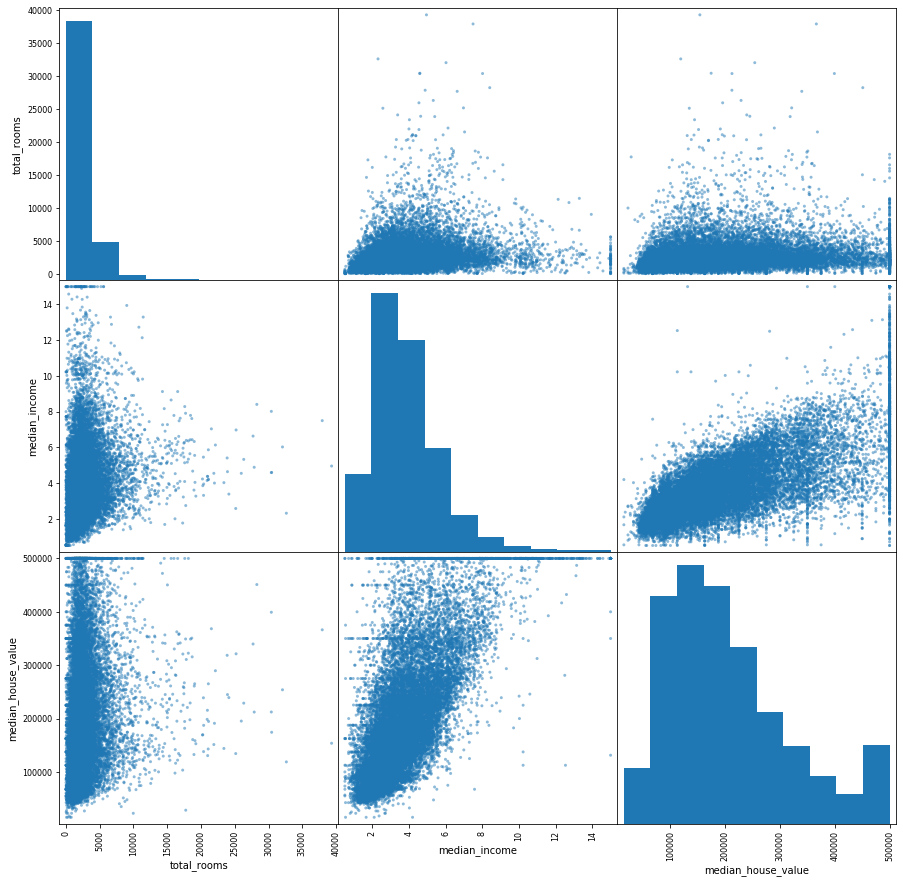

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[att],figsize=(15,15))

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

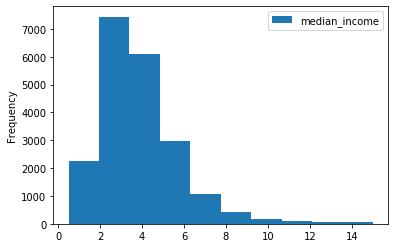

In [19]:
housing.plot(kind='hist',x='income_cat',y='median_income')

In [20]:
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,labels,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very expensive,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,expensive,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,expensive,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,expensive,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,expensive,3


In [22]:
housing_prices = housing.loc[:,['median_house_value','labels']]

In [23]:
housing_prices.head()

,median_house_value,labels
0,452600.0,very expensive
1,358500.0,expensive
2,352100.0,expensive
3,341300.0,expensive
4,342200.0,expensive


In [24]:
len(housing_prices)

20640

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,labels,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very expensive,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,expensive,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,expensive,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,expensive,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,expensive,3


In [26]:
housing.drop('median_house_value',axis=1,inplace=True)

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3


In [28]:
for train_indices , test_indices in split.split(housing,housing.income_cat):
    train_set = housing.loc[train_indices]
    test_set = housing.loc[test_indices]

In [29]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,medium,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,expensive,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,cheap,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,very cheap,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,medium,3


In [30]:
housing.income_cat.value_counts() / len(housing.income_cat)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [31]:
train_set.income_cat.value_counts() / len(train_set.income_cat)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [32]:
test_set.income_cat.value_counts() / len(test_set.income_cat)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
for i in train_set,test_set:
    i.drop('income_cat',axis=1,inplace=True)

In [34]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,medium
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,expensive
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,cheap
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,very cheap
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,medium
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,medium
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,cheap
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,very cheap
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,medium


In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [36]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  object  
 9   labels              20640 non-null  category
 10  income_cat          20640 non-null  category
dtypes: category(2), float64(8), object(1)
memory usage: 1.5+ MB


In [37]:
housing_prices.head()

,median_house_value,labels
0,452600.0,very expensive
1,358500.0,expensive
2,352100.0,expensive
3,341300.0,expensive
4,342200.0,expensive


In [38]:
y = housing.labels

In [39]:
y.head()

0    very expensive
1         expensive
2         expensive
3         expensive
4         expensive
Name: labels, dtype: category
Categories (5, object): [very cheap < cheap < medium < expensive < very expensive]

In [40]:
len(train_set)

16512

In [41]:
len(test_set)

4128

In [42]:
houses = train_set.drop('labels',axis=1).copy()
houses_labels = train_set['labels'].copy()

In [43]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [44]:
houses_labels.head()

17606        medium
18632     expensive
14650         cheap
3230     very cheap
3555         medium
Name: labels, dtype: category
Categories (5, object): [very cheap < cheap < medium < expensive < very expensive]

In [45]:
houses_num = houses.drop('ocean_proximity',axis=1).copy()
houses_cat = houses.ocean_proximity.copy()

In [46]:
houses_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [47]:
houses_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
simp = SimpleImputer(strategy = 'median')

In [50]:
simp.fit(houses_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [51]:
simp.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
houses_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3


In [54]:
houses_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [55]:
len(houses_num)

16512

In [56]:
len(houses_cat)

16512

In [57]:
print(len(housing),len(housing_prices))

20640 20640


In [58]:
housing.index

RangeIndex(start=0, stop=20640, step=1)

In [59]:
housing_prices.index

RangeIndex(start=0, stop=20640, step=1)

In [60]:
housing_prices.head()

,median_house_value,labels
0,452600.0,very expensive
1,358500.0,expensive
2,352100.0,expensive
3,341300.0,expensive
4,342200.0,expensive


In [61]:
houses_extra_attr = pd.concat([housing,housing_prices.drop('labels',axis=1)],axis = 1)

In [62]:
houses_extra_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3,342200.0


In [63]:
houses_extra_attr['bedrooms_per_home'] = houses_extra_attr['total_bedrooms']/houses_extra_attr['total_rooms']

In [64]:
houses_extra_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat,median_house_value,bedrooms_per_home
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5,452600.0,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5,358500.0,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5,352100.0,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4,341300.0,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3,342200.0,0.172096


In [65]:
corr1 = houses_extra_attr.corr()

In [66]:
corr1.median_house_value

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
bedrooms_per_home    -0.255880
Name: median_house_value, dtype: float64

In [67]:
houses_extra_attr['rooms_households'] = houses_extra_attr.total_rooms/houses_extra_attr.households

In [68]:
houses_extra_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat,median_house_value,bedrooms_per_home,rooms_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5,452600.0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5,358500.0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5,352100.0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4,341300.0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3,342200.0,0.172096,6.281853


In [69]:
corr1 = houses_extra_attr.corr()

In [70]:
corr1.median_house_value

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
bedrooms_per_home    -0.255880
rooms_households      0.151948
Name: median_house_value, dtype: float64

In [71]:
houses_extra_attr['pop_per_hh'] = houses_extra_attr.population/houses_extra_attr.households

In [72]:
corr1 = houses_extra_attr.corr()

In [73]:
corr1.median_house_value

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
bedrooms_per_home    -0.255880
rooms_households      0.151948
pop_per_hh           -0.023737
Name: median_house_value, dtype: float64

In [74]:
from sklearn.base import TransformerMixin
class custom_transformer(TransformerMixin):
    def __init__(self):
        return None
    def fit(self,x):
        return self
    def transform(self,x):
        rooms_per_household = x[:,3]/x[:,6]
        bedrooms_per_house = x[:,4]/x[:,3]
        return np.c_[x,rooms_per_household,bedrooms_per_house]

In [75]:
h = pd.read_csv('housing.csv')
h.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
attr_adder = custom_transformer()
h_extra_attr = attr_adder.transform(h.values)

In [77]:
h_extra_attr[0]

array([-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0,
       'NEAR BAY', 6.984126984126984, 0.14659090909090908], dtype=object)

In [78]:
h_extra_attr_df = pd.DataFrame(h_extra_attr)

In [79]:
h_extra_attr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,6.98413,0.146591
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,6.23814,0.155797
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,8.28814,0.129516
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,5.81735,0.184458
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,6.28185,0.172096


In [80]:
len(houses_num)

16512

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline_numbers = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attr_adder',custom_transformer()),
    ('scaler',StandardScaler())
]
)

In [82]:
houses_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [83]:
houses_num_transformed = pipeline_numbers.fit_transform(houses_num)

In [84]:
houses_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [85]:
houses_num_transformed[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452,  0.15531753])

In [86]:
houses_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [87]:
sc = StandardScaler()
scaled = sc.fit_transform(houses_num)

In [88]:
scaled[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44579584,
       -0.63621141, -0.42069842, -0.61493744])

In [89]:
houses_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [90]:
list(houses_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [91]:
num_attr = list(houses_num)
cat_attr = ['ocean_proximity']

In [92]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('num',pipeline_numbers,num_attr),
    ('cat',OneHotEncoder(),cat_attr)
])

In [93]:
print(len(train_indices),len(test_indices))

16512 4128


In [94]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,labels,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very expensive,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,expensive,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,expensive,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,expensive,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,expensive,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,very cheap,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,very cheap,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,very cheap,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,very cheap,2


In [95]:
housing.drop('income_cat',axis=1,inplace=True)

In [96]:
housing_labels = housing['labels']

In [97]:
housing_labels

0        very expensive
1             expensive
2             expensive
3             expensive
4             expensive
              ...      
20635        very cheap
20636        very cheap
20637        very cheap
20638        very cheap
20639        very cheap
Name: labels, Length: 20640, dtype: category
Categories (5, object): [very cheap < cheap < medium < expensive < very expensive]

In [98]:
transformed_houses = ct.fit_transform(housing.drop('labels',axis=1))

In [99]:
len(transformed_houses)

20640

In [100]:
houses_train_set = transformed_houses[train_indices]

In [101]:
len(houses_train_set)

16512

In [102]:
houses_train_set

array([[-1.15813078,  0.77631821,  0.74376842, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58209686, -0.72187882, -1.56051586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7784964 , -0.84828919,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43764398,  1.00104776,  1.85618152, ...,  0.        ,
         1.        ,  0.        ]])

In [103]:
x = houses_train_set.copy()
x

array([[-1.15813078,  0.77631821,  0.74376842, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58209686, -0.72187882, -1.56051586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7784964 , -0.84828919,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43764398,  1.00104776,  1.85618152, ...,  0.        ,
         1.        ,  0.        ]])

In [104]:
train_indices

array([17606, 18632, 14650, ..., 13908, 11159, 15775], dtype=int64)

In [105]:
houses_train_set = pd.DataFrame(x,index = train_indices, columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','bedrooms_per_house','ocean_proximity1','ocean_proximity2','ocean_proximity3','ocean_proximity4','ocean_proximity5'])

In [106]:
len(x)

16512

In [107]:
x[0:5]

array([[-1.15813078,  0.77631821,  0.74376842, -0.48944879, -0.44312579,
        -0.63180398, -0.41990865, -0.61400459, -0.32481578,  0.15415276,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, -0.8969549 , -1.02255019,
        -0.98855745, -1.01103574,  1.34264745,  0.23436673, -0.83891993,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, -0.31342816, -0.15699029,
        -0.43223397, -0.09818904, -0.53088952, -0.48659516,  0.42143023,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.02011274,  0.31749537, -0.2891866 , -0.3615588 , -0.39543654,
         0.03048587, -0.38329016, -1.04579241, -0.0795053 , -0.19813803,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.48900059, -0.6563327 , -0.92485123,  1.81348785,  2.35623324,
         2.67876222,  2.52003317, -0.44003669, 

In [108]:
y = housing_labels[train_indices].copy()

In [109]:
y

17606            medium
18632         expensive
14650             cheap
3230         very cheap
3555             medium
              ...      
6563             medium
12053             cheap
13908        very cheap
11159            medium
15775    very expensive
Name: labels, Length: 16512, dtype: category
Categories (5, object): [very cheap < cheap < medium < expensive < very expensive]

In [110]:
y,labels = pd.factorize(y)

In [111]:
y

array([0, 1, 2, ..., 3, 0, 4], dtype=int64)

In [112]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [113]:
train_labels = pd.DataFrame(housing_labels[train_indices], columns = ['labels'])

In [114]:
train_labels.tail()

,labels
6563,medium
12053,cheap
13908,very cheap
11159,medium
15775,very expensive


In [115]:
y[16507:16512]

array([0, 2, 3, 0, 4], dtype=int64)

In [116]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [117]:
x

array([[-1.15813078,  0.77631821,  0.74376842, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58209686, -0.72187882, -1.56051586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7784964 , -0.84828919,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43764398,  1.00104776,  1.85618152, ...,  0.        ,
         1.        ,  0.        ]])

In [118]:
y

array([0, 1, 2, ..., 3, 0, 4], dtype=int64)

In [119]:
houses_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
17606,-1.158131,0.776318,0.743768,-0.489449,-0.443126,-0.631804,-0.419909,-0.614005,-0.324816,0.154153,1.0,0.0,0.0,0.0,0.0
18632,-1.178096,0.663953,-1.163225,-0.896955,-1.022550,-0.988557,-1.011036,1.342647,0.234367,-0.838920,1.0,0.0,0.0,0.0,0.0
14650,1.182792,-1.339885,0.187562,-0.313428,-0.156990,-0.432234,-0.098189,-0.530890,-0.486595,0.421430,0.0,0.0,0.0,0.0,1.0
3230,-0.020113,0.317495,-0.289187,-0.361559,-0.395437,0.030486,-0.383290,-1.045792,-0.079505,-0.198138,0.0,1.0,0.0,0.0,0.0
3555,0.489001,-0.656333,-0.924851,1.813488,2.356233,2.678762,2.520033,-0.440037,-0.373140,0.268932,1.0,0.0,0.0,0.0,0.0


In [120]:
houses_test_set = transformed_houses[test_indices]

In [121]:
x_test = houses_test_set.copy()

In [122]:
x_test

array([[ 0.58882673, -0.70783322,  0.02864572, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85336601, -0.87169852,  0.8232265 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25940046, -0.66569643, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53891366, -0.67974202,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1228966 , -0.76869747, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32927876,  0.54222492, -0.76593507, ...,  0.        ,
         0.        ,  0.        ]])

In [123]:
houses_test_set = pd.DataFrame(x_test,index = test_indices, columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','bedrooms_per_house','ocean_proximity1','ocean_proximity2','ocean_proximity3','ocean_proximity4','ocean_proximity5'])

In [124]:
houses_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
5241,0.588827,-0.707833,0.028646,1.747022,1.133004,0.669816,1.204383,2.321816,0.520035,-0.870879,1.0,0.0,0.0,0.0,0.0
10970,0.853366,-0.871699,0.823227,0.698232,0.281751,0.215044,0.396161,0.389745,0.387870,-0.862947,1.0,0.0,0.0,0.0,0.0
20351,0.259400,-0.665696,-0.130270,0.788993,0.927940,0.604470,0.984672,-0.452038,-0.184008,-0.019350,1.0,0.0,0.0,0.0,0.0
6568,0.708618,-0.670378,1.856182,-0.389520,-0.550427,-0.359824,-0.464374,0.147980,0.047526,-0.650785,0.0,1.0,0.0,0.0,0.0
13285,0.943210,-0.731243,0.267020,-0.394563,-0.531351,-0.316554,-0.516686,0.087815,0.181270,-0.565435,0.0,1.0,0.0,0.0,0.0


In [125]:
y_test = housing_labels[test_indices].copy()

In [126]:
y_test

5241     very expensive
10970            medium
20351            medium
6568              cheap
13285             cheap
              ...      
20519        very cheap
17430             cheap
4019          expensive
12107             cheap
2398         very cheap
Name: labels, Length: 4128, dtype: category
Categories (5, object): [very cheap < cheap < medium < expensive < very expensive]

In [127]:
y_test = pd.DataFrame(y_test,columns=['labels'])

In [128]:
y_test.head()

,labels
5241,very expensive
10970,medium
20351,medium
6568,cheap
13285,cheap


# Constructing Decision Tree using Gini-Index 

#### x is train set array with no attr names

#### houses_train_set id train df with attr. names made of x

#### y is factorized labels

#### train_labels is df made of y

#### labels is uniques with which train labels are factorized with

#### x_test is est set with no attr. names

#### houses_test set is test df with names of each attribute made of x_test

#### y_test is df of test labels 

In [129]:
x

array([[-1.15813078,  0.77631821,  0.74376842, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58209686, -0.72187882, -1.56051586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7784964 , -0.84828919,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43764398,  1.00104776,  1.85618152, ...,  0.        ,
         1.        ,  0.        ]])

In [130]:
houses_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
17606,-1.158131,0.776318,0.743768,-0.489449,-0.443126,-0.631804,-0.419909,-0.614005,-0.324816,0.154153,1.0,0.0,0.0,0.0,0.0
18632,-1.178096,0.663953,-1.163225,-0.896955,-1.022550,-0.988557,-1.011036,1.342647,0.234367,-0.838920,1.0,0.0,0.0,0.0,0.0
14650,1.182792,-1.339885,0.187562,-0.313428,-0.156990,-0.432234,-0.098189,-0.530890,-0.486595,0.421430,0.0,0.0,0.0,0.0,1.0
3230,-0.020113,0.317495,-0.289187,-0.361559,-0.395437,0.030486,-0.383290,-1.045792,-0.079505,-0.198138,0.0,1.0,0.0,0.0,0.0
3555,0.489001,-0.656333,-0.924851,1.813488,2.356233,2.678762,2.520033,-0.440037,-0.373140,0.268932,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,0.718601,-0.670378,1.379433,-0.625590,-0.717339,-0.752782,-0.757322,0.558239,0.251961,-0.430881,0.0,1.0,0.0,0.0,0.0
12053,1.003105,-0.820198,0.902685,-0.659969,-0.579040,-0.329800,-0.631773,-0.948781,-0.320657,0.490835,0.0,1.0,0.0,0.0,0.0
13908,1.582097,-0.721879,-1.560516,1.017270,0.799179,0.593874,0.694340,-0.314969,0.370802,-0.523942,0.0,1.0,0.0,0.0,0.0
11159,0.778496,-0.848289,0.187562,-0.309761,-0.373976,-0.061352,-0.375443,0.100975,0.030968,-0.305250,1.0,0.0,0.0,0.0,0.0


In [131]:
y

array([0, 1, 2, ..., 3, 0, 4], dtype=int64)

In [132]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [133]:
train_labels

,labels
17606,medium
18632,expensive
14650,cheap
3230,very cheap
3555,medium
...,...
6563,medium
12053,cheap
13908,very cheap
11159,medium


In [134]:
x_test

array([[ 0.58882673, -0.70783322,  0.02864572, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85336601, -0.87169852,  0.8232265 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25940046, -0.66569643, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53891366, -0.67974202,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1228966 , -0.76869747, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32927876,  0.54222492, -0.76593507, ...,  0.        ,
         0.        ,  0.        ]])

In [135]:
houses_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_house,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
5241,0.588827,-0.707833,0.028646,1.747022,1.133004,0.669816,1.204383,2.321816,0.520035,-0.870879,1.0,0.0,0.0,0.0,0.0
10970,0.853366,-0.871699,0.823227,0.698232,0.281751,0.215044,0.396161,0.389745,0.387870,-0.862947,1.0,0.0,0.0,0.0,0.0
20351,0.259400,-0.665696,-0.130270,0.788993,0.927940,0.604470,0.984672,-0.452038,-0.184008,-0.019350,1.0,0.0,0.0,0.0,0.0
6568,0.708618,-0.670378,1.856182,-0.389520,-0.550427,-0.359824,-0.464374,0.147980,0.047526,-0.650785,0.0,1.0,0.0,0.0,0.0
13285,0.943210,-0.731243,0.267020,-0.394563,-0.531351,-0.316554,-0.516686,0.087815,0.181270,-0.565435,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20519,-0.978444,1.380279,0.346478,1.078235,1.507365,0.872919,1.505178,-0.998997,-0.318902,0.315241,0.0,1.0,0.0,0.0,0.0
17430,-0.434391,-0.459694,0.108104,-0.169953,-0.059227,-0.020731,-0.074649,-0.997839,-0.250628,0.187818,0.0,0.0,0.0,0.0,1.0
4019,0.538914,-0.679742,0.187562,0.200424,0.327056,0.053445,0.482476,0.540974,-0.378443,0.084840,1.0,0.0,0.0,0.0,0.0
12107,1.122897,-0.768697,-0.130270,1.296427,0.746721,0.860556,0.880048,0.442331,0.447387,-0.892467,0.0,1.0,0.0,0.0,0.0


In [136]:
y_test

,labels
5241,very expensive
10970,medium
20351,medium
6568,cheap
13285,cheap
...,...
20519,very cheap
17430,cheap
4019,expensive
12107,cheap


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [138]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state = 42, min_samples_split=350)

In [139]:
x

array([[-1.15813078,  0.77631821,  0.74376842, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17809601,  0.66395343, -1.16322546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18279228, -1.33988509,  0.18756187, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58209686, -0.72187882, -1.56051586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7784964 , -0.84828919,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43764398,  1.00104776,  1.85618152, ...,  0.        ,
         1.        ,  0.        ]])

In [140]:
y

array([0, 1, 2, ..., 3, 0, 4], dtype=int64)

In [141]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [142]:
print(len(x),len(y))

16512 16512


In [143]:
clf_gini.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [144]:
houses_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_house', 'ocean_proximity1',
       'ocean_proximity2', 'ocean_proximity3', 'ocean_proximity4',
       'ocean_proximity5'],
      dtype='object')

In [145]:
x.shape

(16512, 15)

In [146]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [147]:
from sklearn.tree import export_graphviz
export_graphviz(
    clf_gini,
    out_file="houses_tree_test1.dot",
    feature_names=list(houses_train_set.columns),
    class_names=labels,
    rounded=True,
    filled=True)

In [148]:
x_test

array([[ 0.58882673, -0.70783322,  0.02864572, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85336601, -0.87169852,  0.8232265 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25940046, -0.66569643, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53891366, -0.67974202,  0.18756187, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1228966 , -0.76869747, -0.13027044, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32927876,  0.54222492, -0.76593507, ...,  0.        ,
         0.        ,  0.        ]])

In [149]:
y_test

,labels
5241,very expensive
10970,medium
20351,medium
6568,cheap
13285,cheap
...,...
20519,very cheap
17430,cheap
4019,expensive
12107,cheap


In [150]:
pred_ones = clf_gini.predict(x_test)

In [151]:
pred_ones

array([4, 0, 0, ..., 0, 2, 3], dtype=int64)

In [152]:
pred_ones_df = pd.DataFrame(labels[pred_ones], index = y_test.index, columns = ['labels'])

In [153]:
pred_ones_df

,labels
5241,very expensive
10970,medium
20351,medium
6568,medium
13285,cheap
...,...
20519,very cheap
17430,medium
4019,medium
12107,cheap


In [154]:
accuracy_score(y_test, pred_ones_df)

0.6315406976744186

In [155]:
confusion_matrix(y_test, pred_ones_df)

array([[1283,    6,  190,  132,    0],
       [  58,  143,  209,    4,   30],
       [ 337,   77,  548,   17,   16],
       [ 238,    2,   11,  501,    0],
       [  18,   77,   98,    1,  132]], dtype=int64)

In [156]:
print(classification_report(y_test,pred_ones_df))

                precision    recall  f1-score   support

         cheap       0.66      0.80      0.72      1611
     expensive       0.47      0.32      0.38       444
        medium       0.52      0.55      0.53       995
    very cheap       0.76      0.67      0.71       752
very expensive       0.74      0.40      0.52       326

      accuracy                           0.63      4128
     macro avg       0.63      0.55      0.58      4128
  weighted avg       0.63      0.63      0.62      4128



In [157]:
pred_ones_df

,labels
5241,very expensive
10970,medium
20351,medium
6568,medium
13285,cheap
...,...
20519,very cheap
17430,medium
4019,medium
12107,cheap


In [158]:
y_test

,labels
5241,very expensive
10970,medium
20351,medium
6568,cheap
13285,cheap
...,...
20519,very cheap
17430,cheap
4019,expensive
12107,cheap


In [159]:
houses_test_set.loc[2398]

longitude              0.329279
latitude               0.542225
housing_median_age    -0.765935
total_rooms           -0.467446
total_bedrooms        -0.507506
population            -1.093641
households            -1.097351
median_income         -0.044727
rooms_per_household    5.970220
bedrooms_per_house    -0.203828
ocean_proximity1       0.000000
ocean_proximity2       1.000000
ocean_proximity3       0.000000
ocean_proximity4       0.000000
ocean_proximity5       0.000000
Name: 2398, dtype: float64

In [160]:
houses_test_set.loc[5241]

longitude              0.588827
latitude              -0.707833
housing_median_age     0.028646
total_rooms            1.747022
total_bedrooms         1.133004
population             0.669816
households             1.204383
median_income          2.321816
rooms_per_household    0.520035
bedrooms_per_house    -0.870879
ocean_proximity1       1.000000
ocean_proximity2       0.000000
ocean_proximity3       0.000000
ocean_proximity4       0.000000
ocean_proximity5       0.000000
Name: 5241, dtype: float64

In [161]:
labels

CategoricalIndex(['medium', 'expensive', 'cheap', 'very cheap',
                  'very expensive'],
                 categories=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive'], ordered=True, dtype='category')

In [162]:
houses_test_set.loc[13285]

longitude              0.943210
latitude              -0.731243
housing_median_age     0.267020
total_rooms           -0.394563
total_bedrooms        -0.531351
population            -0.316554
households            -0.516686
median_income          0.087815
rooms_per_household    0.181270
bedrooms_per_house    -0.565435
ocean_proximity1       0.000000
ocean_proximity2       1.000000
ocean_proximity3       0.000000
ocean_proximity4       0.000000
ocean_proximity5       0.000000
Name: 13285, dtype: float64

In [163]:
houses_test_set.loc[20519]


longitude             -0.978444
latitude               1.380279
housing_median_age     0.346478
total_rooms            1.078235
total_bedrooms         1.507365
population             0.872919
households             1.505178
median_income         -0.998997
rooms_per_household   -0.318902
bedrooms_per_house     0.315241
ocean_proximity1       0.000000
ocean_proximity2       1.000000
ocean_proximity3       0.000000
ocean_proximity4       0.000000
ocean_proximity5       0.000000
Name: 20519, dtype: float64